In [4]:
import pandas as pd
from tqdm import tqdm, trange

In [5]:
csv1 = r"/Users/dan/Documents/Finance/Programs/Financial Machine Learning/Preprocessing/esh4.csv"
csv2 = r"/Users/dan/Documents/Finance/Programs/Financial Machine Learning/Preprocessing/esm4.csv"
csv3 = r"/Users/dan/Documents/Finance/Programs/Financial Machine Learning/Preprocessing/esu3.csv"
csv4 = r"/Users/dan/Documents/Finance/Programs/Financial Machine Learning/Preprocessing/esz3.csv"

In [6]:
#for each one, read it as a csv, 
# # Convert 'time' to datetime in UTC
# df['time'] = pd.to_datetime(df['time'], utc=True)

# # Convert datetime to Unix time with nanosecond precision
# df['time'] = df['time'].apply(lambda x: x.timestamp())

# write it back to a csv as _unix.csv

def convert_to_unix(csv):
    df = pd.read_csv(csv)
    df['time'] = pd.to_datetime(df['time'], utc=True)
    df['time'] = df['time'].apply(lambda x: x.timestamp())
    df.to_csv(csv[:-4] + "_unix.csv", index=False)

csvs = [csv1, csv2, csv3, csv4]
for i in trange(4):
    convert_to_unix(csvs[i])

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [05:28<00:00, 82.24s/it]


In [8]:
df = pd.read_csv(csv1[:-4] + "_unix.csv")
df.symbol.unique()

array(['ESZ3', 'ESH4', 'ESM4', 'ESU4'], dtype=object)

In [25]:
csv = "/Users/dan/Documents/Finance/Programs/Financial Machine Learning/Preprocessing/esm4.csv"
df = pd.read_csv(csv)
df["date"] = pd.to_datetime(df["time"], unit="s",utc=True).dt.tz_convert('US/Eastern').dt.date

In [26]:
df.date[0]

datetime.date(2024, 3, 15)

In [29]:
# find the last index when date = 2024-03-15 and display the next 10 rows after that
import datetime
idx = df[df["date"] == datetime.date(2024, 3, 15)].index[-1]
df.iloc[idx:idx+10]

# take the time at idx +1 and convert it into human readable format from unix time
print(f"""
      {df.time[idx]}
      {pd.to_datetime(df.time[idx], unit="s", utc=True).tz_convert('US/Eastern')}
      {df.time[idx+1]}
      {pd.to_datetime(df.time[idx+1], unit="s", utc=True).tz_convert('US/Eastern')}"
""".strip())

1710536399.596776
      2024-03-15 16:59:59.596776009-04:00
      1710712800.0
      2024-03-17 18:00:00-04:00"


In [30]:
df

,time,price,volume,symbol,date
0,1.710509e+09,5186.00,1,ESM4,2024-03-15
1,1.710509e+09,5186.00,10,ESM4,2024-03-15
2,1.710509e+09,5186.00,4,ESM4,2024-03-15
3,1.710509e+09,5186.00,6,ESM4,2024-03-15
4,1.710509e+09,5186.00,1,ESM4,2024-03-15
...,...,...,...,...,...
24184672,1.718977e+09,5463.25,2,ESM4,2024-06-21
24184673,1.718977e+09,5463.50,1,ESM4,2024-06-21
24184674,1.718977e+09,5463.75,2,ESM4,2024-06-21
24184675,1.718977e+09,5463.75,2,ESM4,2024-06-21


In [44]:
# add a datetime column that shows date and time
df["datetime"] = pd.to_datetime(df["time"], unit="s",utc=True).dt.tz_convert('US/Eastern')
df['dayofweek'] = df['datetime'].dt.dayofweek

In [45]:
# view the dataframe starting from index 379126
df.iloc[372699:]

,time,price,volume,symbol,date,datetime,dayofweek
372699,1.710536e+09,5183.25,9,ESM4,2024-03-15,2024-03-15 16:59:59.596776009-04:00,4
372700,1.710713e+09,5185.75,87,ESM4,2024-03-17,2024-03-17 18:00:00-04:00,6
372701,1.710713e+09,5185.75,2,ESM4,2024-03-17,2024-03-17 18:00:00.035718918-04:00,6
372702,1.710713e+09,5185.75,1,ESM4,2024-03-17,2024-03-17 18:00:00.035763025-04:00,6
372703,1.710713e+09,5185.50,1,ESM4,2024-03-17,2024-03-17 18:00:00.040338993-04:00,6
...,...,...,...,...,...,...,...
24184672,1.718977e+09,5463.25,2,ESM4,2024-06-21,2024-06-21 09:29:59.058638096-04:00,4
24184673,1.718977e+09,5463.50,1,ESM4,2024-06-21,2024-06-21 09:29:59.082065105-04:00,4
24184674,1.718977e+09,5463.75,2,ESM4,2024-06-21,2024-06-21 09:29:59.210445881-04:00,4
24184675,1.718977e+09,5463.75,2,ESM4,2024-06-21,2024-06-21 09:29:59.215425968-04:00,4


In [46]:
# last index where date= datetime(2024, 3, 15)
df[df["date"] == datetime.date(2024, 3, 17)].index[-1]

385084

<Axes: >

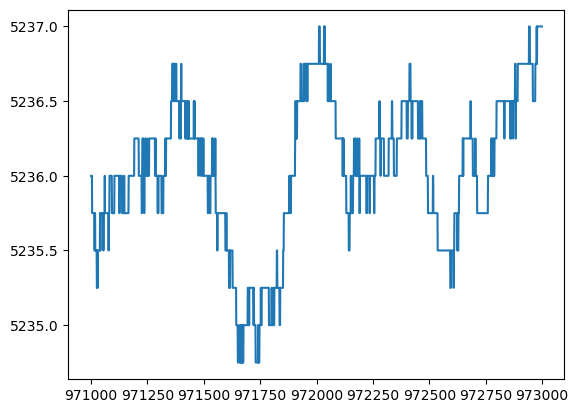

In [53]:
df.iloc[971000:973000].price.plot()

In [51]:
# look for stretches of 100 consecutive ticks of the same price
# output dates that contain such runs


def find_runs(df, run_length):
    df["run"] = (df["price"] == df["price"].shift()).cumsum()
    runs = df.groupby(["date", "run"]).size().reset_index(name="count")
    runs = runs[runs["count"] == run_length]
    return runs["date"].unique()

find_runs(df, 20)

array([datetime.date(2024, 4, 12), datetime.date(2024, 4, 16),
       datetime.date(2024, 5, 31), datetime.date(2024, 6, 12),
       datetime.date(2024, 6, 13)], dtype=object)